In [1]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 30)  # None으로 설정하면 모든 행 출력

In [3]:
# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [5]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime
# 오늘 날짜 구하기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today = '2024-12-19'

In [6]:
df_etfs = pd.read_csv(f'new_etf_{today}.csv')

In [7]:
df_etfs.shape

(930, 17)

In [8]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,1057346.0,0.8398,289552,306219,95099,KODEX,False,False,False


#### 수치형 변수로 히스토그램 그리기

In [9]:
df_num_vars = df_etfs.select_dtypes(np.number).drop(['Category','RiseFall'],axis=1)
df_num_vars

,Price,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,1057560,300,0.03,1057346.0,0.8398,289552,306219,95099
1,55425,15,0.03,55424.0,0.8187,218161,12090,68508
2,21195,-465,-2.15,21193.0,17.1444,4928789,104522,64136
3,32330,-750,-2.27,32414.0,-3.7589,3830187,123991,55462
4,108975,15,0.01,108965.0,0.8328,44974,4900,43609
...,...,...,...,...,...,...,...,...
925,5260,-30,-0.57,5254.0,-7.8398,60,0,16
926,1951,-144,-6.87,1948.0,-1.1793,47674,93,16
927,6445,-60,-0.92,6453.0,-3.7010,126,0,15
928,16440,-390,-2.32,16424.0,29.4117,23,0,10


In [10]:
df_num_vars.columns

Index(['Price', 'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume',
       'Amount', 'MarCap'],
      dtype='object')

In [11]:
num_cols = df_num_vars.columns.tolist()
num_cols

['Price',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap']

<Axes: ylabel='Frequency'>

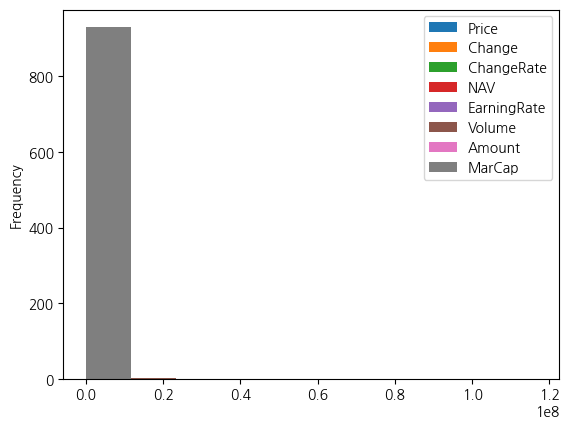

In [12]:
df_num_vars[num_cols].plot(kind='hist')

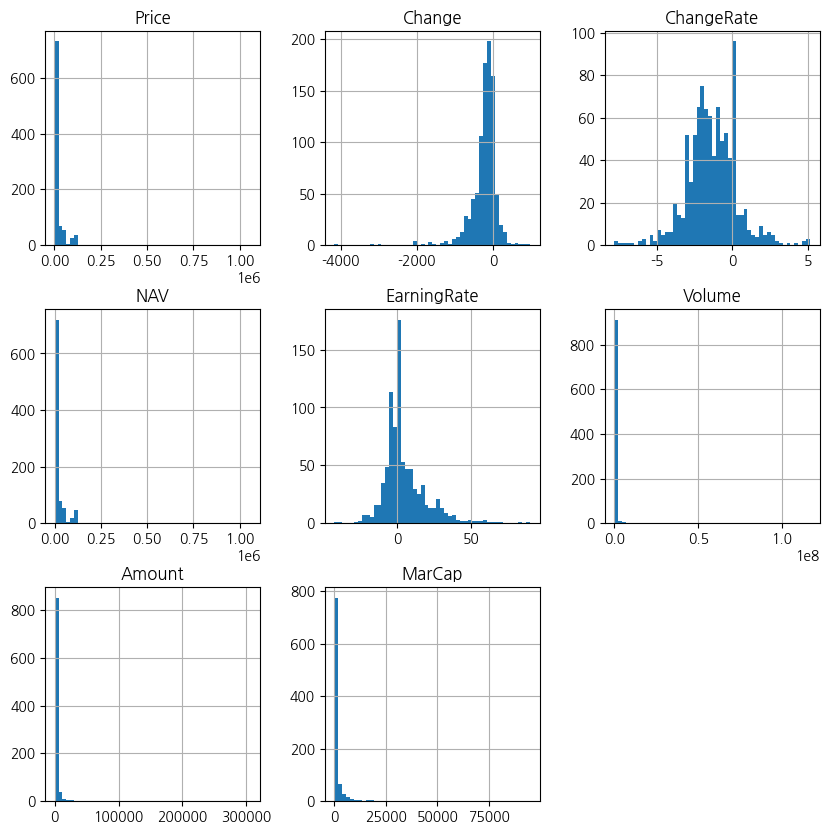

In [13]:
df_num_vars[num_cols].hist(figsize=(10,10),bins=50)
plt.show()

#### 데이터 프레임에서 지원하는 matplolib의 플로팅
- 범주형 + 수치형
  - 'line' : line plot (default)
  - 'bar' : vertical bar plot
  - 'barh' : horizontal bar plot
  - 'box' : boxplot
  - 'area' : area plot
  - 'pie' : pie plot
  
- 수치형변수
  - 'hist' : histogram
  - 'kde' : Kernel Density Estimation plot
  - 'density' : same as 'kde'- 
  
  
- 수치형변수 + 수치형변수
  - 'scatter' : scatter plot (DataFrame only)
  - 'hexbin' : hexbin plot (DataFrame only)

In [14]:
def findAttr( module, txt ) :
  import re
  data_list = dir(module)
  pattern = re.compile(rf'{txt}')

  matches = [item for item in data_list if pattern.search(item)]
  return matches
 
findAttr(df_num_vars[num_cols],'hist')

['hist']

<Axes: xlabel='MarCap', ylabel='Count'>

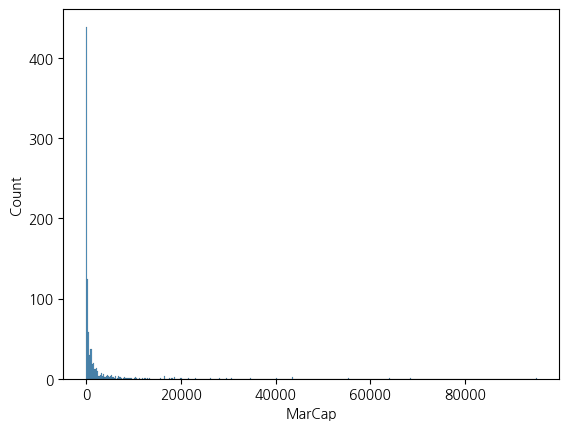

In [15]:
sns.histplot(data=df_etfs, x='MarCap')

In [16]:
tmp = pd.melt(df_num_vars)
tmp

,variable,value
0,Price,1057560.0
1,Price,55425.0
2,Price,21195.0
3,Price,32330.0
4,Price,108975.0
...,...,...
7435,MarCap,16.0
7436,MarCap,16.0
7437,MarCap,15.0
7438,MarCap,10.0


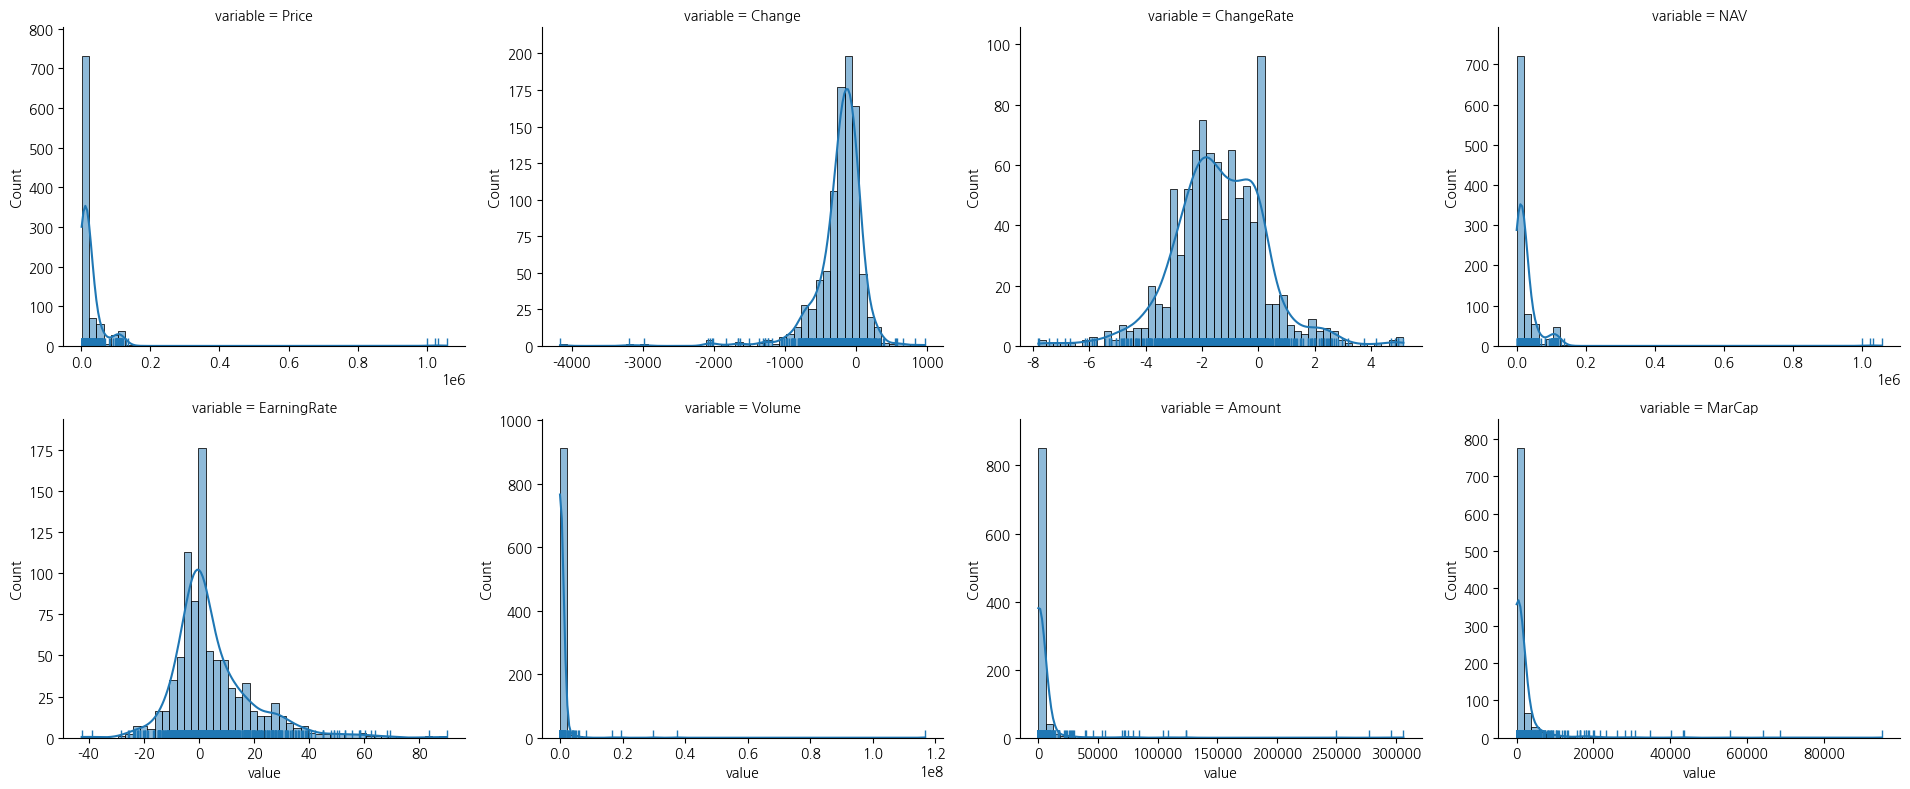

In [38]:
g = sns.FacetGrid(data=tmp ,col='variable', col_wrap=4, height=4, aspect=1.2, sharex=False, sharey=False, palette='Blues_r')
g.map(sns.histplot,'value',bins=50, kde=True)
g.map(sns.rugplot,'value')


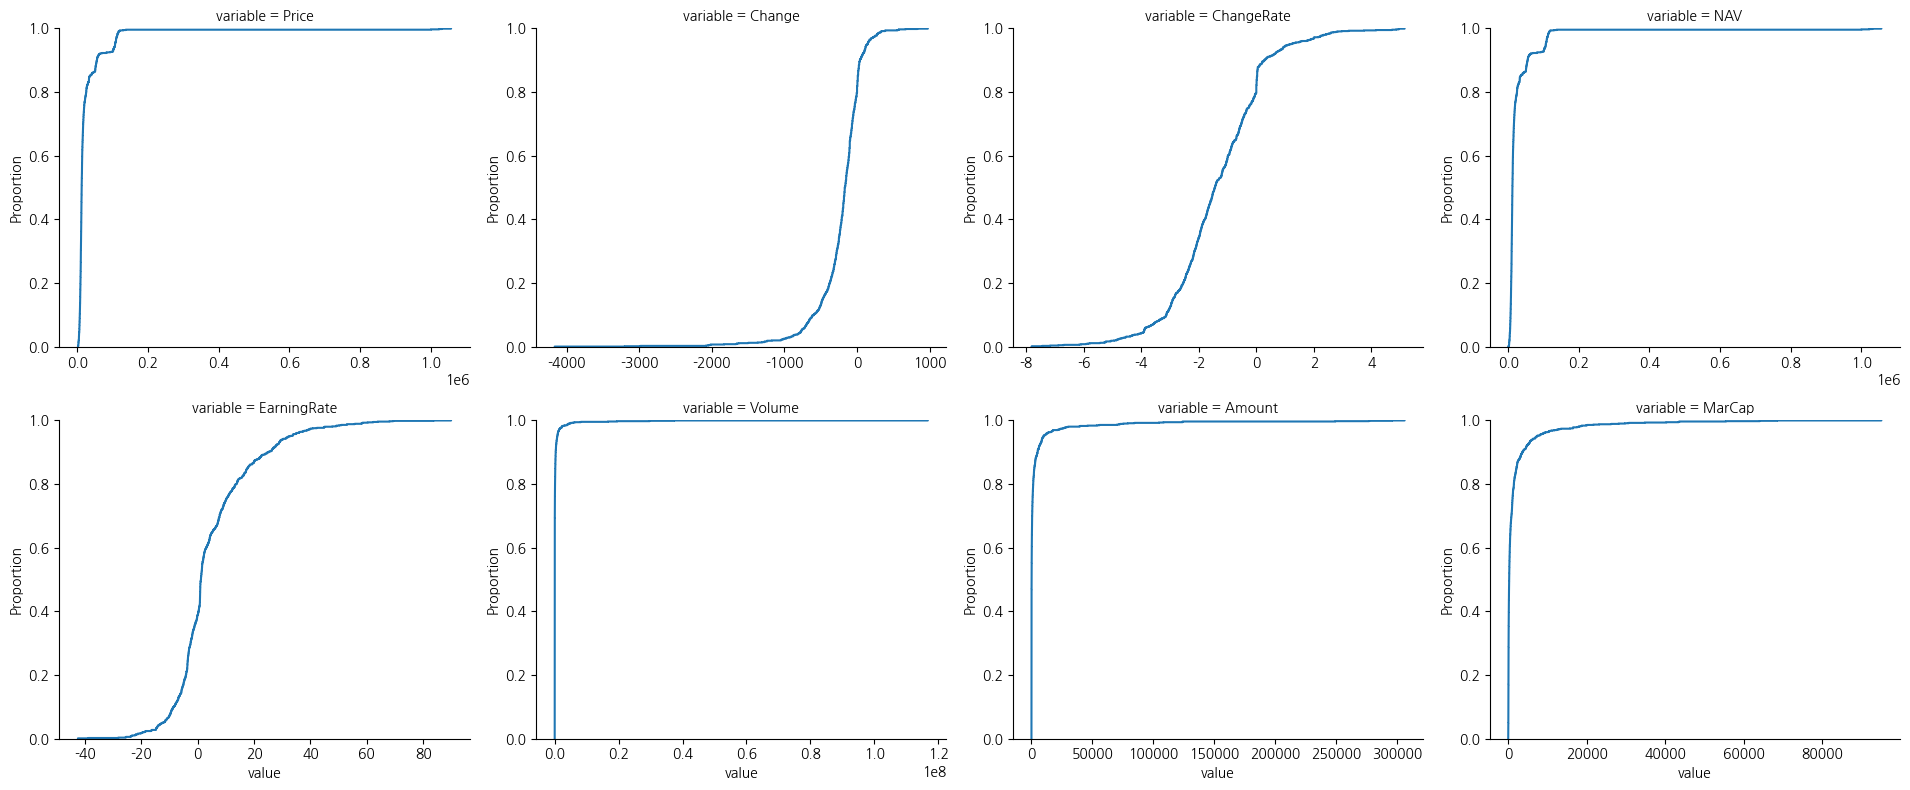

In [23]:
g = sns.FacetGrid(data=tmp ,col='variable', col_wrap=4, height=4, aspect=1.2, sharex=False, sharey=False, palette='Blues_r')
g.map(sns.ecdfplot,'value')

#### 표준화 VS 정규화
- 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용
- 표준화(standardization) :
  - 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
  - (Z-score 표준화) : (측정값 - 평균) / 표준편차
- 정규화(normalization) :
  - 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
  - (측정값 - 최소값) / (최대값 - 최소값)

In [44]:
num_cols

['Price',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap']

In [46]:
# 수치형 변수의 스케일 조정 파생열 추가
for col in num_cols:
  df_etfs[f'{col}_z_score'] = (df_etfs[col]-df_etfs[col].mean()) / df_etfs[col].std()
  df_etfs[f'{col}_norm'] = (df_etfs[col] - df_etfs[col].min()) / (df_etfs[col].max() - df_etfs[col].min())


In [47]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지,Price_z_score,Price_norm,Change_z_score,Change_norm,ChangeRate_z_score,ChangeRate_norm,NAV_z_score,NAV_norm,EarningRate_z_score,EarningRate_norm,Volume_z_score,Volume_norm,Amount_z_score,Amount_norm,MarCap_z_score,MarCap_norm
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,1057346.0,0.8398,289552,306219,95099,KODEX,False,False,False,14.476592,1.0,1.454085,0.868677,0.84622,0.604938,14.474714,1.0,-0.28037,0.327316,-0.0253,0.00248,14.230339,1.0,14.883359,1.0


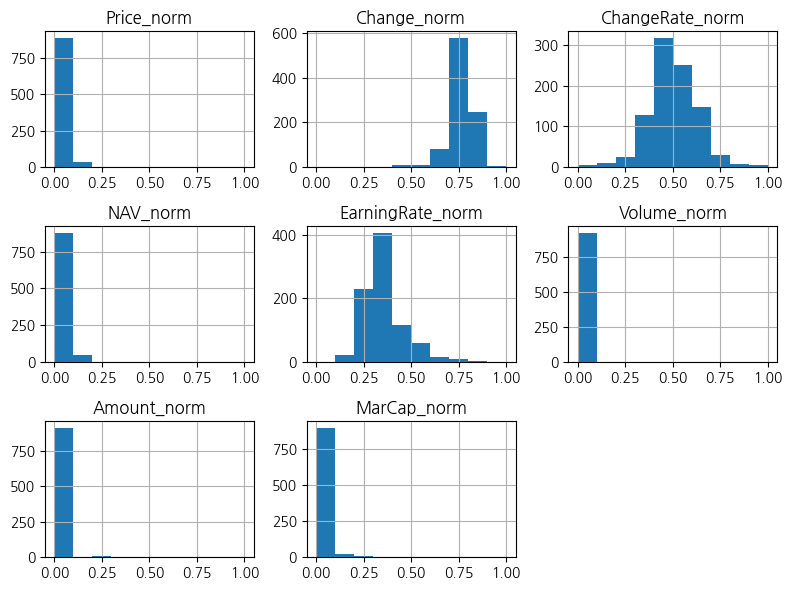

In [57]:
df_etfs.filter(regex=f'(_norm)$',axis=1).hist(figsize=(8,6))
plt.tight_layout()
plt.show()


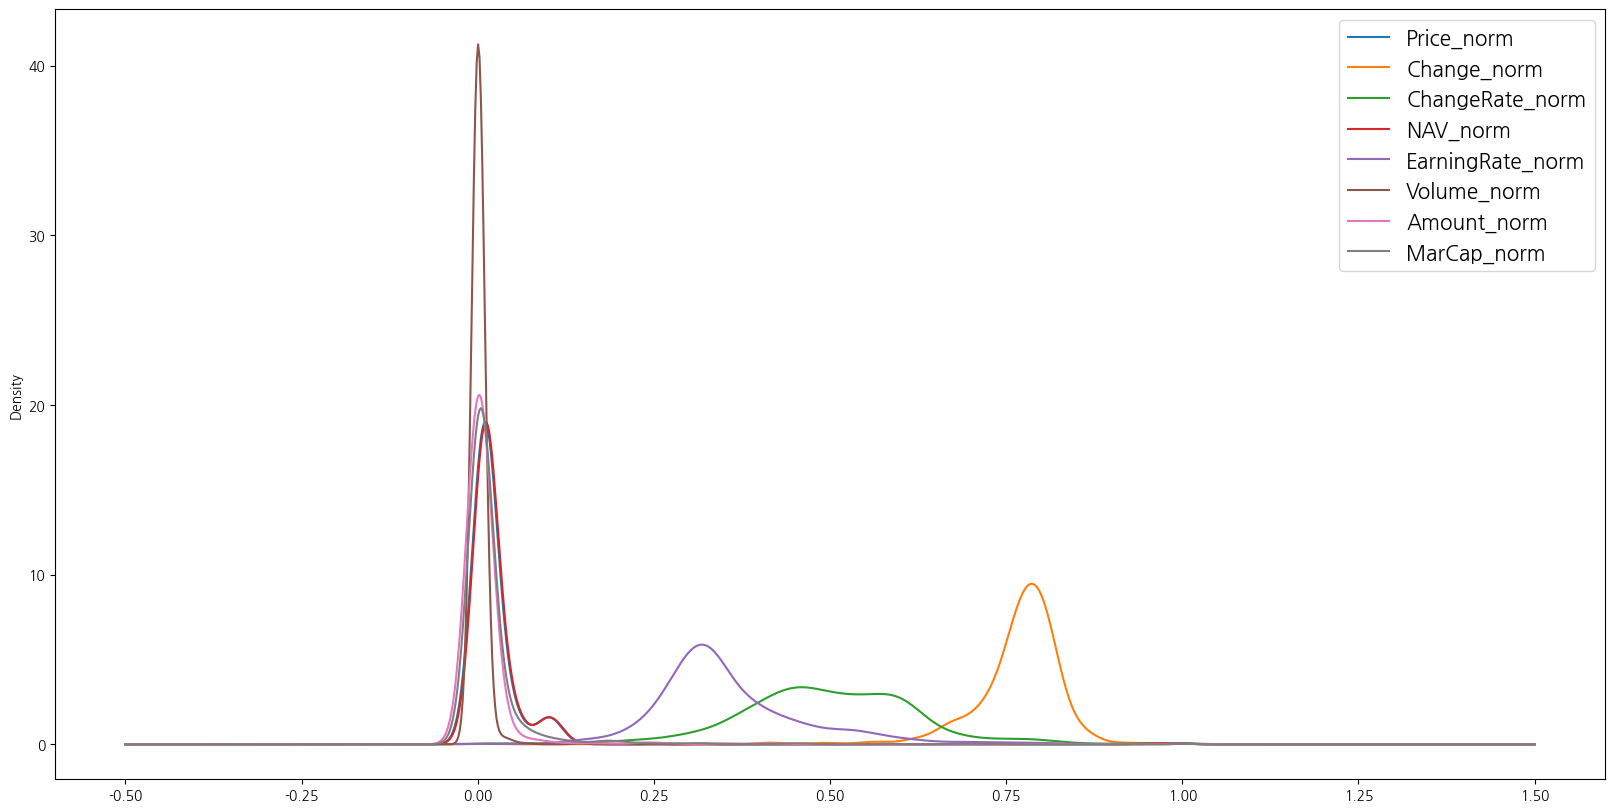

In [ ]:
df_etfs.filter(regex=f'(_norm)$',axis=1).plot(kind='kde',figsize=(20,10))
plt.legend(fontsize=15)
plt.show()

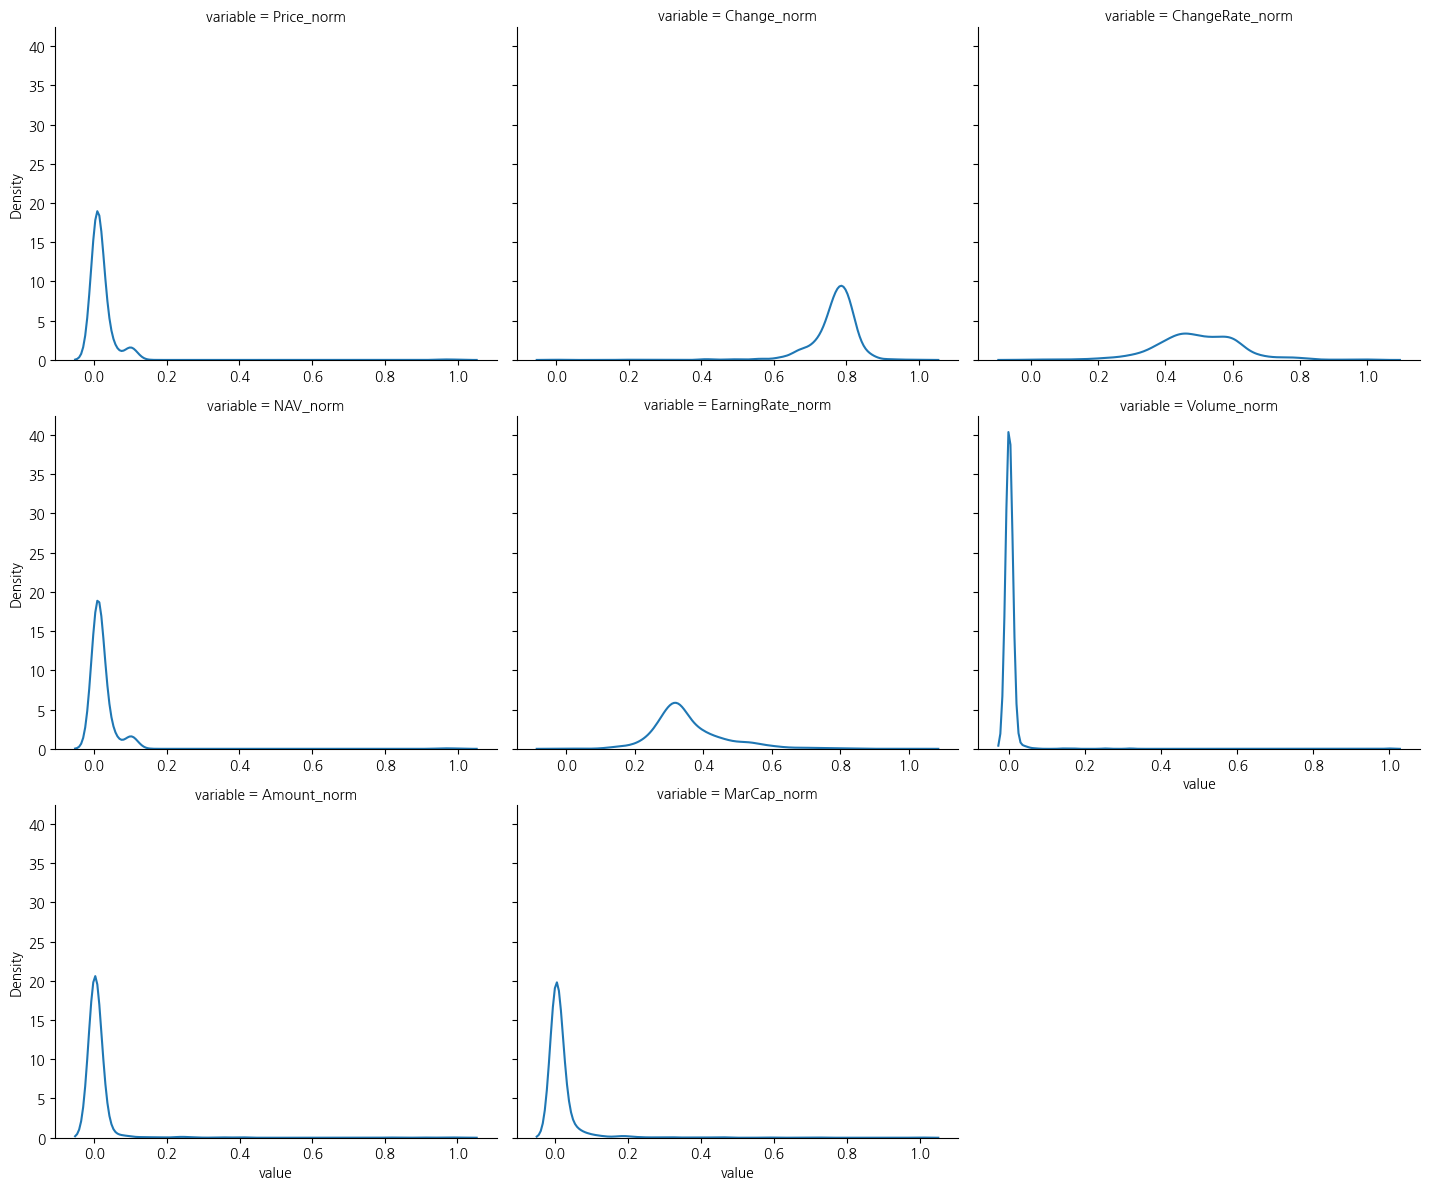

In [74]:
tmp = pd.melt(df_etfs.filter(regex=f'(_norm)$',axis=1))
g=sns.FacetGrid(data=tmp, col='variable',col_wrap=3, aspect=1.2, height=4, sharex=False)
g.map_dataframe(sns.kdeplot, x='value')

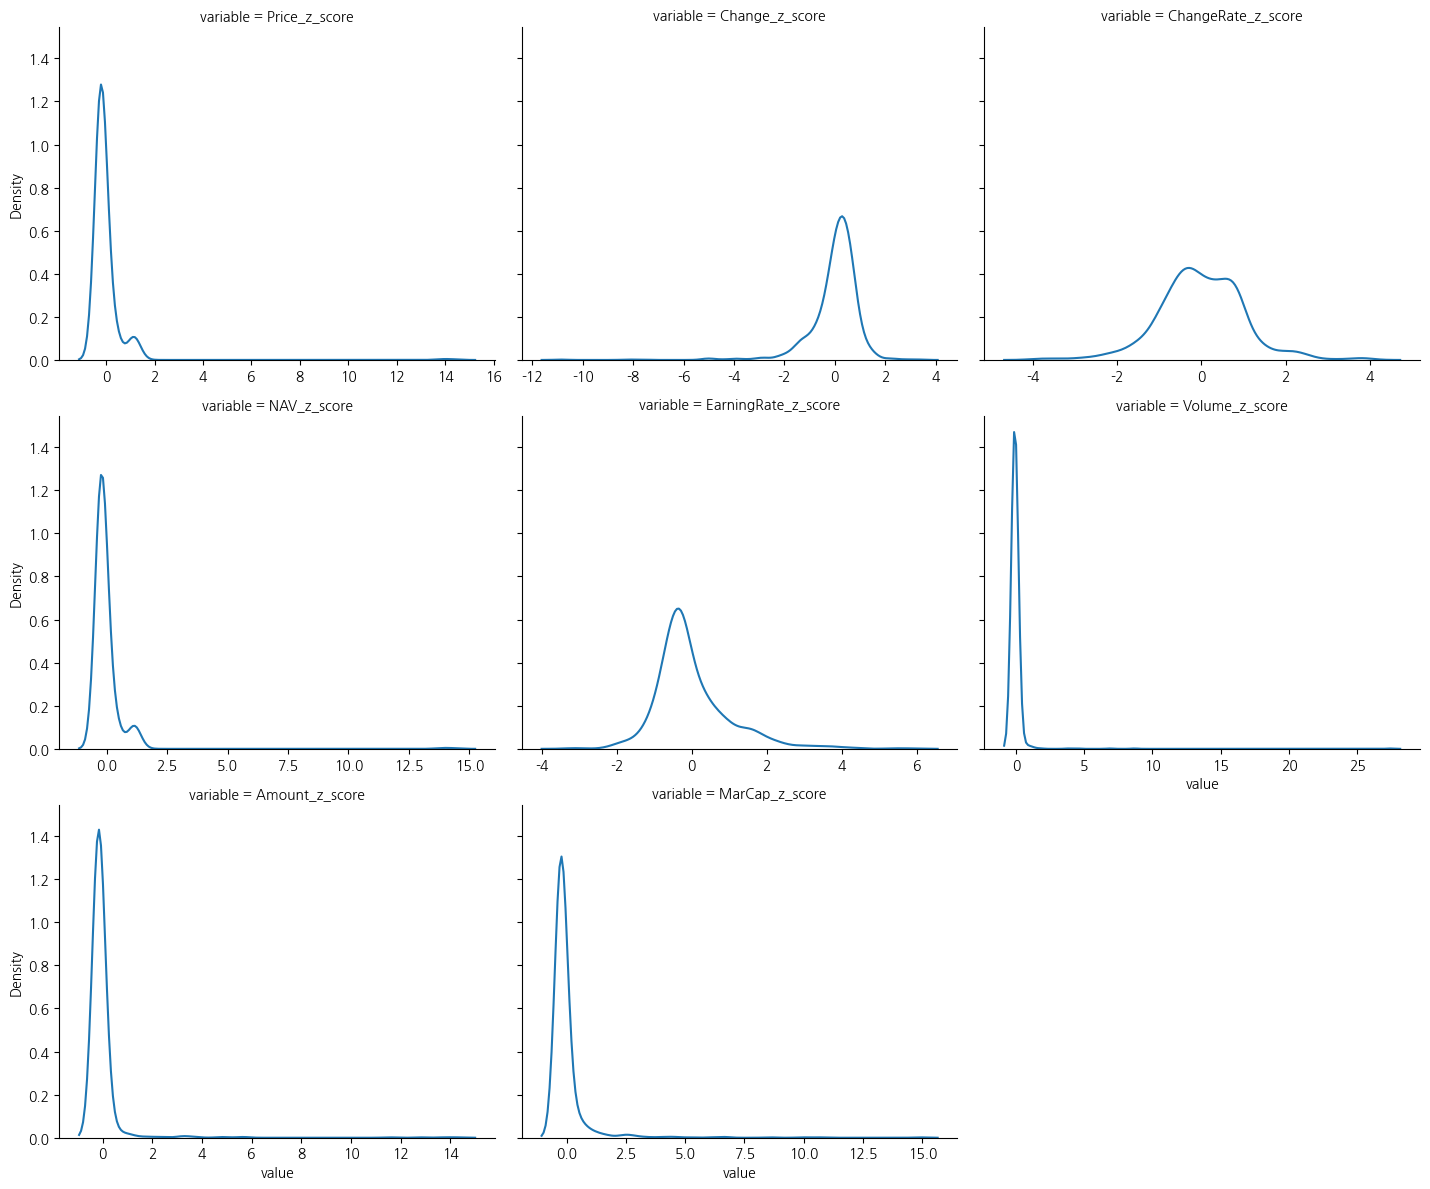

In [75]:
tmp = pd.melt(df_etfs.filter(regex=f'(_z_score)$',axis=1))
g=sns.FacetGrid(data=tmp, col='variable',col_wrap=3, aspect=1.2, height=4, sharex=False)
g.map_dataframe(sns.kdeplot, x='value')

#### 범주형 + 수치형 변수

Text(0.5, 1.0, '브랜드별 평균 3개월 수익률')

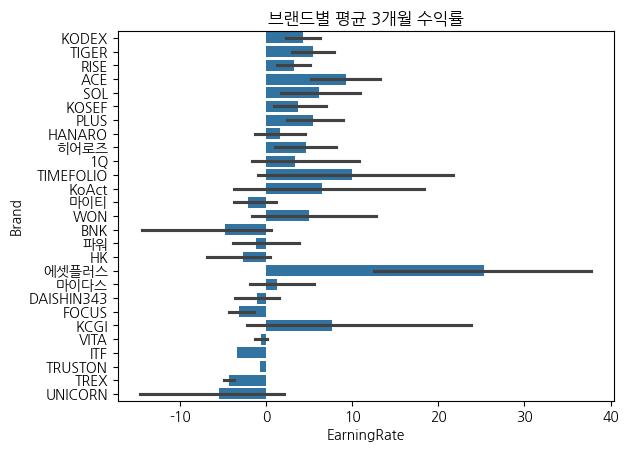

In [86]:
# 브랜드에 대한 3개월 수익률의 평균 시각화
g = sns.barplot(data=df_etfs,
                y='Brand',
                x='EarningRate',estimator=np.mean)
g.set_title('브랜드별 평균 3개월 수익률')

In [84]:
# 브랜드에 대한 3개월 수익률의 평균을 groupby로 직접 구하기
brand_3month_mean = df_etfs.groupby(['Brand']).agg({'EarningRate':'mean'})
brand_3month_mean

,EarningRate
Brand,
1Q,3.385340
ACE,9.257866
BNK,-4.690375
DAISHIN343,-1.050950
FOCUS,-3.066400
HANARO,1.583174
HK,-2.713825
ITF,-3.327800
KCGI,7.632300


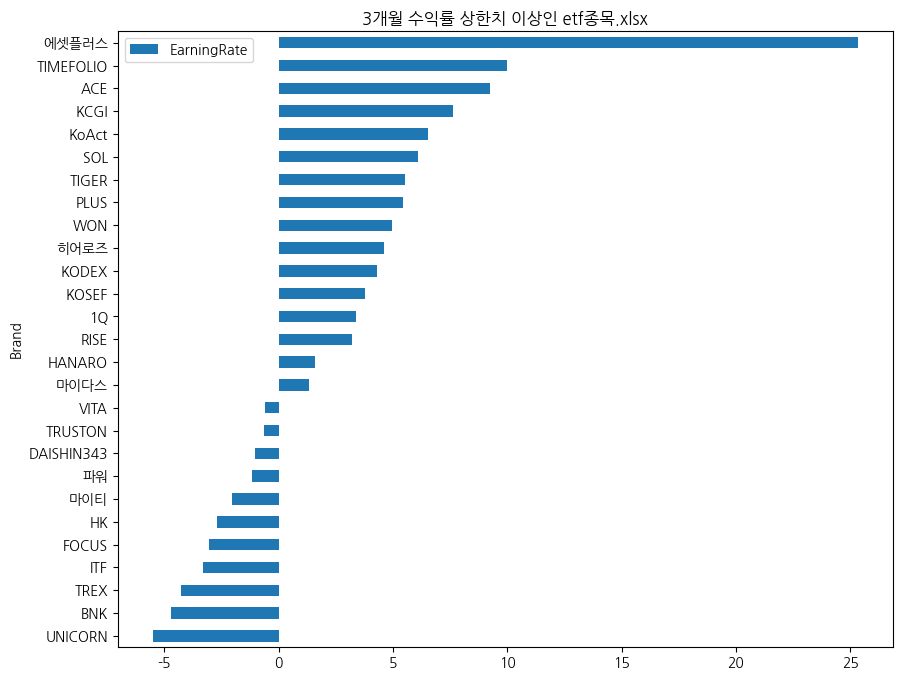

In [ ]:
brand_3month_mean.sort_values(by='EarningRate').plot.barh(title='3개월 수익률 상한치 이상인 etf종목.xlsx',figsize=(10,8))
plt.show()

In [100]:
df_etfs.columns

Index(['Symbol', 'Category', 'CategoryName', 'Name', 'Price', 'RiseFall',
       'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume', 'Amount',
       'MarCap', 'Brand', '인버스', '레버리지', '헤지', 'Price_z_score', 'Price_norm',
       'Change_z_score', 'Change_norm', 'ChangeRate_z_score',
       'ChangeRate_norm', 'NAV_z_score', 'NAV_norm', 'EarningRate_z_score',
       'EarningRate_norm', 'Volume_z_score', 'Volume_norm', 'Amount_z_score',
       'Amount_norm', 'MarCap_z_score', 'MarCap_norm'],
      dtype='object')

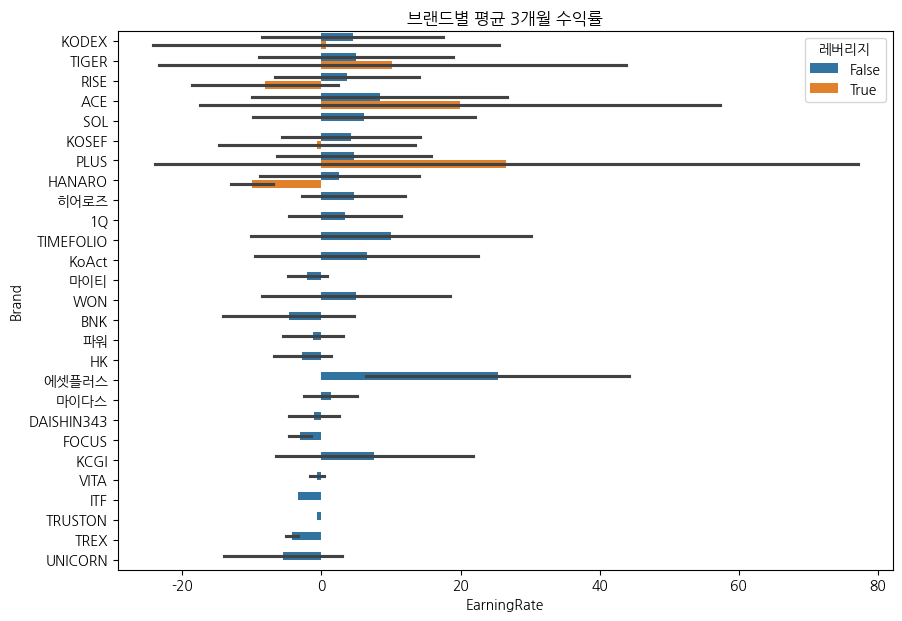

In [137]:
# 브랜드에 대한 3개월 수익률의 평균 시각화
plt.figure(figsize=(10,7))
g = sns.barplot(data=df_etfs,
                y='Brand',
                x='EarningRate',
                hue='레버리지',
                errorbar='sd',  # 표준편차
                estimator=np.mean)
g.set_title('브랜드별 평균 3개월 수익률')
plt.show()

In [111]:
g = df_etfs.groupby(['Brand','레버리지']).agg({'EarningRate':'mean'})
g.style.background_gradient(cmap='Greens')

In [133]:
import re
matches = [item for item in df_etfs.Name.tolist() if re.compile(r'\d{1}X').search(item)]
matches

['KODEX 200선물인버스2X',
 'KODEX 미국달러선물인버스2X',
 'TIGER 200선물인버스2X',
 'RISE 200선물인버스2X',
 'TIGER 미국달러선물인버스2X',
 'KOSEF 미국달러선물인버스2X',
 'PLUS 200선물인버스2X',
 'KOSEF 200선물인버스2X',
 'HANARO 200선물레버리지1.5X',
 'HANARO 코스닥150선물레버리지1.5X']

<Axes: xlabel='EarningRate', ylabel='Brand'>

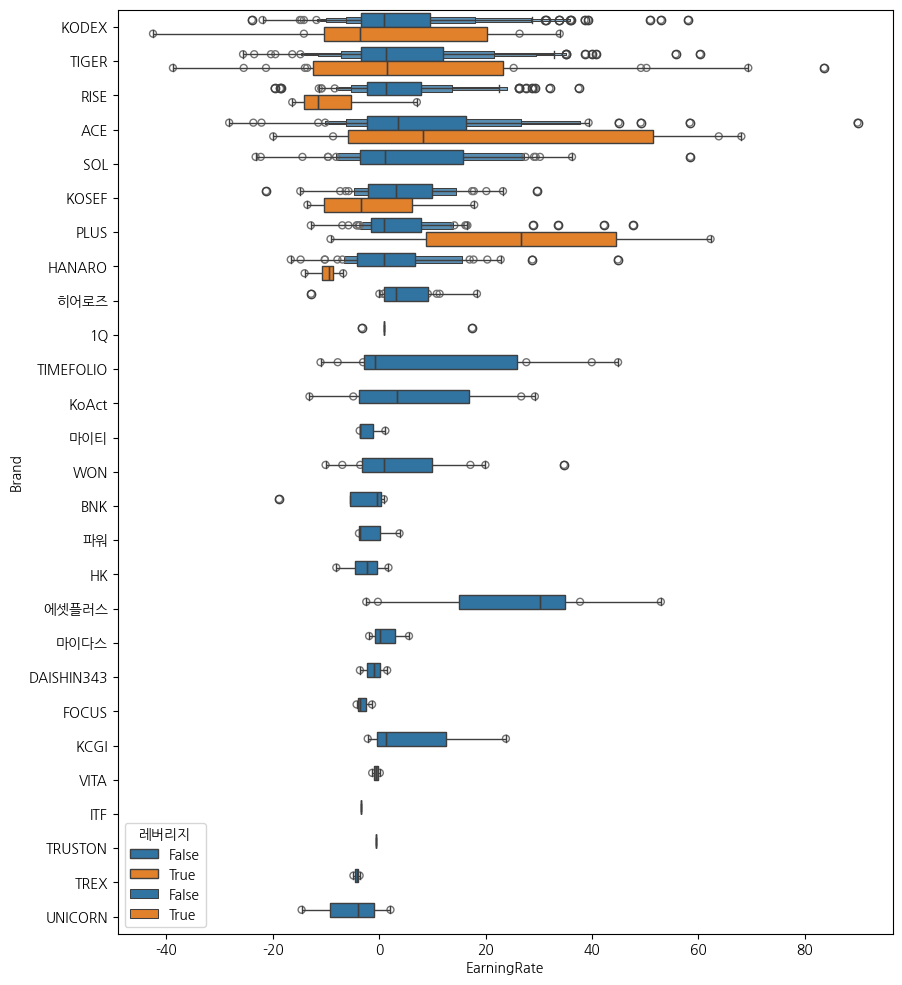

In [140]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df_etfs, x='EarningRate', y='Brand', hue='레버리지')
